In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [2]:
x = torch.tensor(5.0)

In [3]:
x

tensor(5.)

In [4]:
x.requires_grad_()

tensor(5., requires_grad=True)

In [5]:
y = x**2

In [6]:
y.backward()

In [7]:
x.grad

tensor(10.)

In [8]:
x = tf.Variable(5.0)

In [10]:
with tf.GradientTape() as t:
    t.watch(x)
    y = x**2

In [12]:
t.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [13]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # P.ej.: Dosis del fármaco para tratar la enfermedad de Alzheimer
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [14]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # Ej: Puntuación de «olvido» del paciente
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

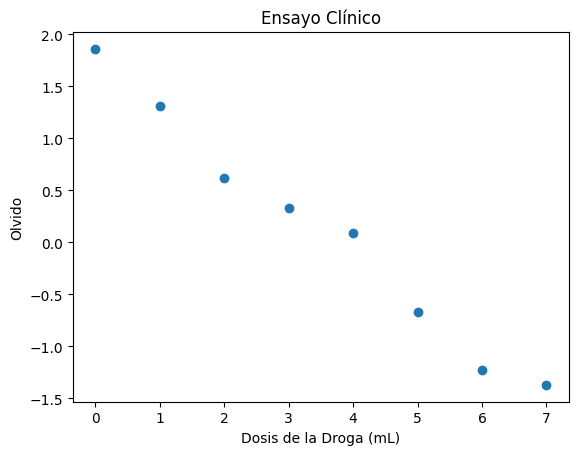

In [15]:
fig, ax = plt.subplots()
plt.title("Ensayo Clínico")
plt.xlabel("Dosis de la Droga (mL)")
plt.ylabel("Olvido")
_ = ax.scatter(x, y)

In [16]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [17]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [18]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [19]:
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [39]:
_min, x_max = ax.get_xlim()

In [40]:
_min

np.float64(-0.35000000000000003)

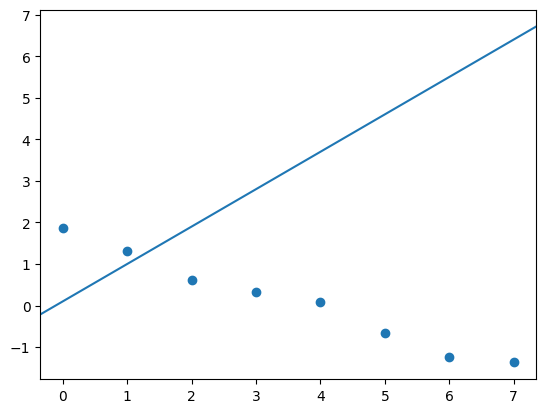

In [20]:
regression_plot(x, y, m, b)

In [21]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [22]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [23]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [24]:
C.backward()

In [25]:
m.grad

tensor([36.3050])

In [26]:
b.grad

tensor([6.2650])

In [27]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [28]:
optimizer.step()

In [29]:
m

tensor([0.5369], requires_grad=True)

In [30]:
b

tensor([0.0374], requires_grad=True)

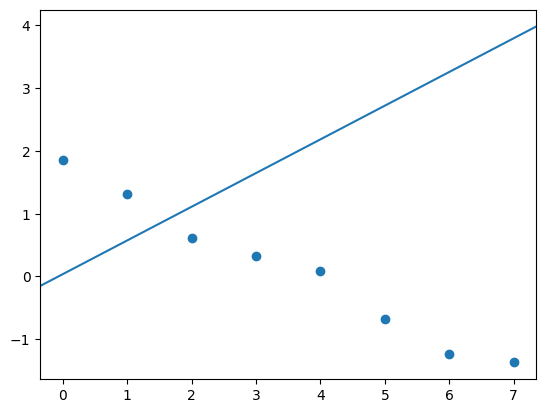

In [31]:
regression_plot(x, y, m, b)

In [32]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

In [33]:

epochs = 1000
for epoch in range(epochs):

    optimizer.zero_grad() # Reinicial gradiente a zero; si no, se acumularía

    yhat = regression(x, m, b) # Paso 1
    C = mse(yhat, y) # Paso 2

    C.backward() # Paso 3
    optimizer.step() # Paso 4

    print('Epoch {}, coste {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, coste 8.57, m grad 23.2, b grad 3.6
Epoch 1, coste 4.08, m grad 14.8, b grad 1.91
Epoch 2, coste 2.25, m grad 9.49, b grad 0.831
Epoch 3, coste 1.51, m grad 6.11, b grad 0.15
Epoch 4, coste 1.2, m grad 3.96, b grad -0.28
Epoch 5, coste 1.07, m grad 2.59, b grad -0.552
Epoch 6, coste 1.01, m grad 1.72, b grad -0.723
Epoch 7, coste 0.981, m grad 1.17, b grad -0.829
Epoch 8, coste 0.962, m grad 0.82, b grad -0.894
Epoch 9, coste 0.948, m grad 0.595, b grad -0.934
Epoch 10, coste 0.936, m grad 0.452, b grad -0.957
Epoch 11, coste 0.925, m grad 0.361, b grad -0.969
Epoch 12, coste 0.915, m grad 0.302, b grad -0.975
Epoch 13, coste 0.904, m grad 0.265, b grad -0.977
Epoch 14, coste 0.894, m grad 0.241, b grad -0.976
Epoch 15, coste 0.884, m grad 0.225, b grad -0.973
Epoch 16, coste 0.874, m grad 0.214, b grad -0.969
Epoch 17, coste 0.864, m grad 0.207, b grad -0.965
Epoch 18, coste 0.854, m grad 0.202, b grad -0.96
Epoch 19, coste 0.845, m grad 0.199, b grad -0.955
Epoch 20, coste 0

In [41]:
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [42]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

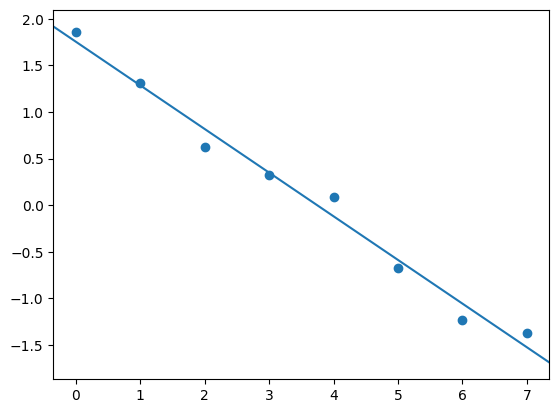

In [34]:
regression_plot(x, y, m, b)

In [35]:
m.item()

-0.4681258499622345

In [36]:
b.item()

1.7542961835861206

In [44]:
def regression_plotText(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    print(x_min)
    print(x_max)
    print(y_min)
    print(y_max)

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

-0.35000000000000003
7.35
1.918140172958374
-1.6864286661148071


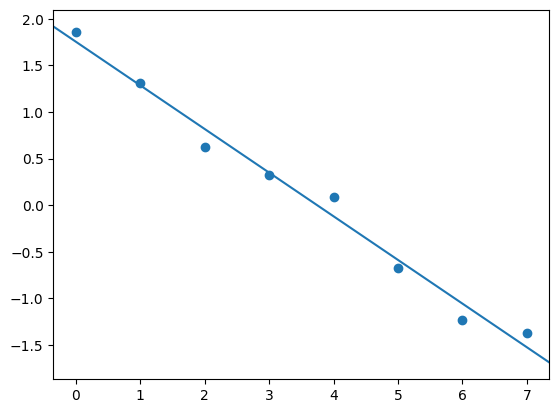

In [45]:
regression_plotText(x, y, m, b)